<a href="https://colab.research.google.com/github/tzlilLV97/Mission1DeepLearning/blob/main/HW1_Alon_Tzlil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alon Feldman 312213135\
Tzlil lev-or 318646510**


## Question 1. Data


In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


In [2]:
load_from_drive = True

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Mounted at /content/gdrive


In [3]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [4]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [5]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a)

In [6]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here

# We would want to get a model that will have accurate predictions on input that he hasn't seen before.
# Usually we'll divide our dataset into train and test to examine the model preformence (evaluate) 
# On data he hasn't encountered before to avoid overfitting. 
# Specificly - we'll want independece between the training set and the test set (mutual information between them == 0).
# When the dataset is songs, there is high probability that there will be simillarity between different songs by the same artist.
# ("producer effect"-> mutual information of songs by the same artist != 0)
# So to make sure that our division between train and test is good , we want to avoid the "Producer effect".
# By divide the test set and train set at index 463715, we guarante that what we just mention won't happen.

### Part (b)

In [7]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

In [8]:
# Write your explanation here

# We assume that all the samples were given by the same probability rule -> 
# So we'll train the network to find the best weigths that match this distrubation.
# When subtracting the mean and divide by stds we normalize the samples to "act" like there from the same RV.
# And than we create a model based on that variable (W,b).
# So when we want to predicte\evaluate our model, we must to normalize the test data set according to the
# SAME normalization we did to the train set.
# Otherwise it's meaningless to use a trained model, that is weaigh was optimize by this normalization, 
# On some samples that dont have been noramalize by the same parameters.


### Part (c)

In [9]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here

# We would want to limit the times we use the test set because we want our model evaluation to be the best we can achieve,
# By exposing the model into the test set we will create a dependency between the model building process and the test set,
# And risk at overfitting.  
# We should use the validation set during the model building process and not the test data set because what we've just explained, 
# So we could examine the hyper-parameters of the model currectly without creating any dependency between the model and the test data.
# Otherewise it will make us to twik the hyper-parameters to match the test set untill we fail with overfitting.
# (train on the training set, exaime hyper-parameters on the validation set, evaluate on the test set)


## Part 2. Classification


In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  e=0.00001 #To avoid log(0)=-inf
  cross_entropy=  -t * np.log(y+e) - (1 - t) * np.log(1 - y+e)

  return cross_entropy

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) 


In [11]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  return sigmoid(np.dot(X,np.transpose(w))+b)

pred(np.zeros(90), 1, np.ones([2, 90]))


array([0.73105858, 0.73105858])

### Part (b) 

In [12]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  N=len(y)
  error=y-t
  dLdw=1/N*np.dot(np.transpose(X),error)
  dLdb=np.mean(error)
  return (dLdw,dLdb)


# **Explenation on Gradients**

\begin{align}
        &\frac{\partial C}{\partial w_j}=\frac{\partial C}{\partial \sigma}\frac{\partial \sigma}{\partial z}\frac{\partial z}{\partial w_j} \\
        &C=\frac{1}{N}\sum_{i=1}^N-t_i\cdot log(\sigma_i)-(1-t_i)\cdot log(1-\sigma_i)\\
        &\sigma_i=sigmoid(z_i)\\
        &z_i=w^T\cdot x_i+b\\
        &\frac{\partial C}{\partial \sigma}=\frac{1}{N}\sum_{i=1}^N\frac{\sigma(z)-t}{\sigma(z)(1-\sigma(z))}\\
        &\frac{\partial \sigma}{\partial z}=\sigma(z)(1-\sigma(z))\\
        &\frac{\partial z}{\partial w_j}=x^j →\text{ the j feature of sample x}\\
        &\frac{\partial C}{\partial w_j}=(\sigma(z)-t) \cdot x^j \\
        &\text{For $\frac{\partial C}{\partial b}$ we get  the mean error i.e $error_i=\sigma(z_i)-t_i$}\\
        &\text{And $\frac{\partial C}{\partial b}=\frac{1}{N}\sum_{i=1}^Nerror_i$}\\
        &\text{Finally in Vector Form:}\\
        &\frac{\partial C}{\partial w}=\frac{1}{N}X^T\cdot \vec{error}
    \end{align}

### Part (c)
 $\frac{\partial\mathcal{L}}{\partial b}$

In [13]:
# Your code goes here
b=1
h=0.00001
X=np.ones([2, 90])
y=pred(np.zeros(90), b, X)       #this is for x in f(x)
y_h=pred(np.zeros(90), b+h, X)   #this is for x+h f(x+h)
t=np.ones(2)

r1 = (cost(y_h,t)-cost(y,t))/h      #f(x+h)-f(x)/h
_,r2 = derivative_cost(X,y,t)
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)


The analytical results is - -0.2689367595898329
The algorithm results is -  -0.2689414213699951


### Part (d)
 $\frac{\partial\mathcal{L}}{\partial {\bf w}}$

In [14]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code
b=1
w=np.zeros(90)
h=0.0001
X=np.ones([2, 90])
y=pred(w, b, X)       #this is for x in f(x)
t=np.ones(2)
r1=np.zeros(90)
for i in range(90):
  w[i]+=h
  y_h=pred(w, b, X)   #this is for x+h f(x+h)
  w[i]-=h
  r1[i] = (cost(y_h,t)-cost(y,t))/h      #f(x+h)-f(x)

r2,_ = derivative_cost(X,y,t)
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)



The analytical results is - [-0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791 -0.26892791
 -0.26892791 -0.2689279

### Part (e)

In [15]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  global train_xs
  global train_ts
  global train_norm_xs
  iter = 0
  running_cost=[]

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_xs))
    train_xs = train_xs[reindex]
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y=pred(w,b,X)
      # update w and b
      dLdw , dLdb = derivative_cost(X,y,t)
      b=b-mu*dLdb
      w=w-mu*dLdw
      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        val_y=pred(w,b,val_norm_xs)
        val_cost1 = cost(val_y[:25000],val_ts[:25000])
        val_cost2 = cost(val_y[25000:],val_ts[25000:])
        val_cost=1/2*(val_cost1+val_cost2)
        val_acc1 = get_accuracy(val_y[:25000],val_ts[:25000])
        val_acc2 = get_accuracy(val_y[25000:],val_ts[25000:])
        val_acc=1/2*(val_acc1+val_acc2)
        running_cost.append(val_cost)
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (iter, val_acc * 100, val_cost))

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
  
  return w,b,running_cost,val_acc



### Part (f)


Iter 10. [Val Acc 47%, Loss 2.808397]
Iter 20. [Val Acc 47%, Loss 2.806658]
Iter 30. [Val Acc 47%, Loss 2.804729]
Iter 40. [Val Acc 47%, Loss 2.802821]
Iter 50. [Val Acc 47%, Loss 2.801228]
Iter 60. [Val Acc 47%, Loss 2.799427]
Iter 70. [Val Acc 48%, Loss 2.797788]
Iter 80. [Val Acc 48%, Loss 2.795730]
Iter 90. [Val Acc 48%, Loss 2.794030]
Iter 100. [Val Acc 48%, Loss 2.792551]
Iter 10. [Val Acc 49%, Loss 2.518795]
Iter 20. [Val Acc 51%, Loss 2.353287]
Iter 30. [Val Acc 53%, Loss 2.213698]
Iter 40. [Val Acc 55%, Loss 2.094592]
Iter 50. [Val Acc 57%, Loss 1.986825]
Iter 60. [Val Acc 58%, Loss 1.882994]
Iter 70. [Val Acc 59%, Loss 1.780360]
Iter 80. [Val Acc 60%, Loss 1.690033]
Iter 90. [Val Acc 61%, Loss 1.609059]
Iter 100. [Val Acc 62%, Loss 1.547785]
Iter 10. [Val Acc 52%, Loss 2.288587]
Iter 20. [Val Acc 56%, Loss 2.014165]
Iter 30. [Val Acc 59%, Loss 1.777793]
Iter 40. [Val Acc 61%, Loss 1.633703]
Iter 50. [Val Acc 64%, Loss 1.476813]
Iter 60. [Val Acc 66%, Loss 1.368192]
Iter 70. [

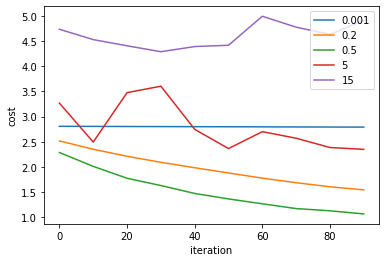

In [16]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
mu=[0.001,0.2,0.5,5,15] #check for 5 value of mu
run_cost=[[] for i in range(len(mu))] #array to save the learning process
for m in range(len(mu)):  #for each learning rate mu, run gradient descent and save the learning cosr process
  _,_,costRun,accRun=run_gradient_descent(w0,b0,mu=mu[m])
  run_cost[m]=costRun

#plot resulte
for m in range(len(mu)):
  plt.plot([10*i for i in range(len(run_cost[m]))],run_cost[m])
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend(mu)
plt.show()


**Explain and discuss your results here:**
 $$$$
As we see, for too small learning rate ($\mu=0.001$) the convergence is  very slow, almost can't be seen at the graph. $$$$
For too large learning rate ($\mu=5,15$) there is no convergence - it's not even monotonic. $$$$
For good value of learning rate ($\mu=0.2,0.5$) we can see fast and good convergence.$$$$
As we can see, when the learning rate is too big, there is a high overshoot due to large step size, and when it too small, it does converge but really really slowly as we've learned in class. we can see when using 100 iteration and batch size of 100, the proper value of the step size (from what we test) is around $\frac{1}{2}$.$$$$ 
The algorithm of SGD is calculating gradient at each iteration , so when the step size is too big , it can "throw" you away from the minimum , so it will increase the gradiant even more in the next iteration.\
 On the other hand, if the learning rate to small, it will take alot more steps to get to the minimum and we risk at stucking in local minimum.\
Optimal learning rate will convergae in "good" time and hopefully to global minimum.
$$$$
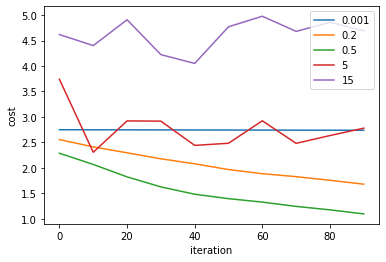

$$$$



### Part (g)

In [17]:

w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
# Write your code here
# After running alot of diffrente values for mu&batch and finding the ones with 
# Minimum lost, we post here our code with only some sample to save your runnig time :)
mu = [0.4,0.6,0,8,1,1.19,1.5,2]
batch_size = [10, 100, 400, 800,1200, 1500, 2000]
resulteArray=[]

#costRun is vector of "cost to iteration" so we save only the final iteration's cost to sort by him:
for indx,m in enumerate(mu):
  for batch in batch_size:
    w,b,costRun,acc=run_gradient_descent(w0,b0,m,batch)
    resulteArray.append([w,b,costRun[-1],acc,m,batch])

temp=resulteArray
bestOne=resulteArray.sort(key=lambda x: x[2])


Iter 10. [Val Acc 48%, Loss 2.733915]
Iter 20. [Val Acc 48%, Loss 2.649048]
Iter 30. [Val Acc 48%, Loss 2.537804]
Iter 40. [Val Acc 50%, Loss 2.456161]
Iter 50. [Val Acc 51%, Loss 2.376470]
Iter 60. [Val Acc 52%, Loss 2.244649]
Iter 70. [Val Acc 53%, Loss 2.177082]
Iter 80. [Val Acc 52%, Loss 2.123997]
Iter 90. [Val Acc 52%, Loss 2.072886]
Iter 100. [Val Acc 53%, Loss 2.006118]
Iter 10. [Val Acc 47%, Loss 2.735412]
Iter 20. [Val Acc 48%, Loss 2.617445]
Iter 30. [Val Acc 49%, Loss 2.512064]
Iter 40. [Val Acc 50%, Loss 2.418844]
Iter 50. [Val Acc 51%, Loss 2.327781]
Iter 60. [Val Acc 51%, Loss 2.261522]
Iter 70. [Val Acc 52%, Loss 2.188396]
Iter 80. [Val Acc 53%, Loss 2.118118]
Iter 90. [Val Acc 54%, Loss 2.045939]
Iter 100. [Val Acc 55%, Loss 1.978539]
Iter 10. [Val Acc 47%, Loss 2.757983]
Iter 20. [Val Acc 48%, Loss 2.629729]
Iter 30. [Val Acc 49%, Loss 2.518213]
Iter 40. [Val Acc 49%, Loss 2.415692]
Iter 50. [Val Acc 50%, Loss 2.312850]
Iter 60. [Val Acc 51%, Loss 2.227726]
Iter 70. [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Iter 20. [Val Acc 57%, Loss 4.922452]
Iter 30. [Val Acc 59%, Loss 5.028623]
Iter 40. [Val Acc 60%, Loss 5.112469]
Iter 50. [Val Acc 61%, Loss 5.060992]
Iter 60. [Val Acc 63%, Loss 5.164967]
Iter 70. [Val Acc 61%, Loss 5.247025]
Iter 80. [Val Acc 66%, Loss 5.158714]
Iter 90. [Val Acc 62%, Loss 5.175422]
Iter 100. [Val Acc 60%, Loss 5.218261]
Iter 10. [Val Acc 60%, Loss 3.620445]
Iter 20. [Val Acc 68%, Loss 3.174379]
Iter 30. [Val Acc 67%, Loss 3.345394]
Iter 40. [Val Acc 63%, Loss 3.534716]
Iter 50. [Val Acc 63%, Loss 4.164971]
Iter 60. [Val Acc 66%, Loss 3.824045]
Iter 70. [Val Acc 62%, Loss 3.897396]
Iter 80. [Val Acc 64%, Loss 3.231474]
Iter 90. [Val Acc 58%, Loss 3.550215]
Iter 100. [Val Acc 66%, Loss 3.694888]
Iter 10. [Val Acc 59%, Loss 4.069542]
Iter 20. [Val Acc 63%, Loss 4.072088]
Iter 30. [Val Acc 63%, Loss 3.856073]
Iter 40. [Val Acc 64%, Loss 3.853810]
Iter 50. [Val Acc 63%, Loss 3.824547]
Iter 60. [Val Acc 65%, Loss 3.507971]
Iter 70. [Val Acc 67%, Loss 3.323377]
Iter 80. [

**Explain and discuss your results here:**\
The steps we take:
1. Run gradient_descent in nested loop of different hyper-parameters ($\mu$ ,$batch$)
2. Evaluate each run against the validation test.
3. Sorte them by the cost.
4. Choose the one that gave the minimum cost as the best Hyper-parameters.

After testing wide range of $\mu$ and batch_size, we took the paramters from the first element in the sorted array (by cost in the final iteration) as the model paramters.
We choose to plot the the results at indexes : $[0, \frac{N}{4}, \frac{N}{2} , \frac{3N}{4} , N]$ in order to show good/bad behavior.\
As shown in the graph below:\
 -> "good" behavior in blue and orange, monotonic decrese cost. \
 -> "bad" behavior in purple and red, non-monotonic and kind of increase cost.

 As we learnd, small batch size - more stocastic behavior, converge to the true gradiant by the law of big numbers, large batch size- close to the true gradiant, because each iteration we compute larger amount of derivatives, for learning rate, small value lead to slower convergence, to large value lead to juggeling and divergence, so we search for the best cross-match between btach size and eargning rate.

the code in the next section is to make the plot so you may ignore him.
$$$$$
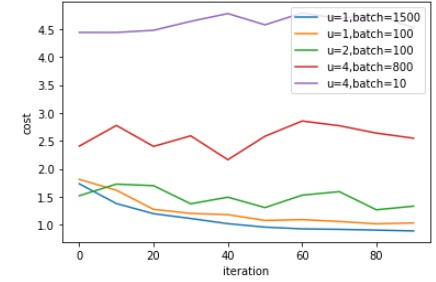

Iter 10. [Val Acc 61%, Loss 1.625959]
Iter 20. [Val Acc 65%, Loss 1.262333]
Iter 30. [Val Acc 68%, Loss 1.094262]
Iter 40. [Val Acc 70%, Loss 1.005570]
Iter 50. [Val Acc 71%, Loss 0.949526]
Iter 60. [Val Acc 72%, Loss 0.916416]
Iter 70. [Val Acc 72%, Loss 0.897641]
Iter 80. [Val Acc 72%, Loss 0.891405]
Iter 90. [Val Acc 73%, Loss 0.882752]
Iter 100. [Val Acc 73%, Loss 0.876162]
Iter 10. [Val Acc 57%, Loss 1.940577]
Iter 20. [Val Acc 60%, Loss 1.663928]
Iter 30. [Val Acc 62%, Loss 1.457310]
Iter 40. [Val Acc 65%, Loss 1.319195]
Iter 50. [Val Acc 66%, Loss 1.276617]
Iter 60. [Val Acc 67%, Loss 1.169148]
Iter 70. [Val Acc 68%, Loss 1.101127]
Iter 80. [Val Acc 69%, Loss 1.059326]
Iter 90. [Val Acc 68%, Loss 1.019193]
Iter 100. [Val Acc 71%, Loss 1.000534]
Iter 10. [Val Acc 52%, Loss 2.455886]
Iter 20. [Val Acc 53%, Loss 2.282651]
Iter 30. [Val Acc 54%, Loss 2.166017]
Iter 40. [Val Acc 55%, Loss 2.076400]
Iter 50. [Val Acc 56%, Loss 2.001737]
Iter 60. [Val Acc 57%, Loss 1.933248]
Iter 70. [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Iter 10. [Val Acc 58%, Loss 5.074036]
Iter 20. [Val Acc 54%, Loss 4.958598]
Iter 30. [Val Acc 57%, Loss 5.089963]
Iter 40. [Val Acc 59%, Loss 5.175107]
Iter 50. [Val Acc 58%, Loss 5.095995]
Iter 60. [Val Acc 60%, Loss 5.114695]
Iter 70. [Val Acc 61%, Loss 5.233850]
Iter 80. [Val Acc 62%, Loss 5.177700]
Iter 90. [Val Acc 62%, Loss 5.119178]
Iter 100. [Val Acc 67%, Loss 5.086911]


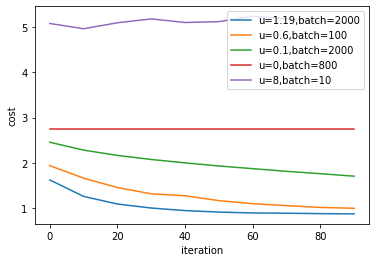

In [18]:
#Find the best (mu,batch) that bring the cost to minimum:
myPlace = temp
myPlace.sort(key=lambda x: x[2])

w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
N = len(myPlace)

#get 5 different couple of (mu,batch) - the best one, the N/4'th ,the N/2'th and the 3N/4'th
mu=[myPlace[0][-2], myPlace[N//4][-2], myPlace[N//2][-2], myPlace[3*N//4][-2],myPlace[-1][-2]]
batch=[myPlace[0][-1], myPlace[N//4][-1], myPlace[N//2][-1], myPlace[3*N//4][-1],myPlace[-1][-1]]
run_cost=[[] for i in range(len(mu))]
run_acc=[[] for i in range(len(mu))]
i =0

#run them to get data for plot:
for u,b in zip(mu,batch):
  _,_,costRun,_=run_gradient_descent(w0,b0,u,b)
  run_cost[i]=costRun
  i+=1

#plot them:
for m in range(len(mu)):
  plt.plot([10*i for i in range(len(run_cost[m]))],run_cost[m])
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend(["u={0},batch={1}".format(round(mu[0],4),batch[0]),"u={0},batch={1}".format(round(mu[1],4),batch[1]),"u={0},batch={1}".format(round(mu[2],4),batch[2]),"u={0},batch={1}".format(round(mu[3],4),batch[3]),"u={0},batch={1}".format(round(mu[4],4),batch[4])])
plt.show()

### Part (h)

In [19]:
w=myPlace[0][0]
b=myPlace[0][1]

pred_train=pred(w,b,train_norm_xs)
pred_val=pred(w,b,val_norm_xs)
pred_test=pred(w,b,test_norm_xs)

train_acc = get_accuracy(pred_train,train_ts)
val_acc = get_accuracy(pred_val,val_ts)
test_acc = get_accuracy(pred_test,test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

train_acc =  0.723565739700035  val_acc =  0.72646  test_acc =  0.7178190974239783


**Explain and discuss your results here:**

As we could guesses, there is a difference between the accuracies, because Every one of the accuricies was calculated on different and unique data set. 
But they are very familliar, because our model predicted successfully the probability rule of the data.

Our resulte:
WhatsApp Image 2022-11-18 at 13.19.44.jpeg

### Part (i)

In [20]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(train_norm_xs,train_ts)

pred_train=model.predict(train_norm_xs)
pred_val=model.predict(val_norm_xs)
pred_test=model.predict(test_norm_xs)

train_acc = get_accuracy(pred_train,train_ts)
val_acc = get_accuracy(pred_val,val_ts)
test_acc = get_accuracy(pred_test,test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  0.7325888594805603  val_acc =  0.73508  test_acc =  0.7267092775518109


sklearn resulte:
$$$$
WhatsApp Image 2022-11-18 at 13.19.57.jpeg